<a href="https://colab.research.google.com/github/yashukaushik01/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Twitter Sentiment Analysis**

---


In [1]:
#@title Import Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#@title Making Tweepy Object
accessToken = '853589383831851010-S1G2nVWzD471mPciMJOmZGHWeV1pJle'
accessTokenSecret = 'O09HnlrFsl94uEYOZ3KnCOSSvHlN8kIv0iTiP1aHz5ZDk'
authenticate = tweepy.OAuthHandler(consumer_key='qm2SB0EhIWfDeVMVatmc3r0Y7', consumer_secret='MuFjZj4Viy3SDbyUxTjcB1C3hlkZawRrUPTMyBsGYeXIqOko6z')
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [3]:
#@title Extracting Tweets
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "JoeBiden", count = 200, lang = "en", tweet_mode = "extended")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

1) We’ve made historic economic progress and created more jobs than any administration has done in the first six months of being in office.
 
Now, we have a chance to turn this great movement into an economy that works for all Americans—not just the wealthy.

2) RT @POTUS: Happy birthday, @BarackObama. I’m proud to call you a brother and a friend — and I’m grateful for your selfless service to this…

3) Workers shouldn’t just compete for jobs. Jobs should compete for workers. https://t.co/2o4a7Bjd9c

4) RT @POTUS: We are prepared to deal with the surge in COVID-19 cases like never before.  
 
Unlike a year ago, we have the ability to save l…

5) It’s past time the super wealthy and profitable corporations began paying their fair share. https://t.co/cHHSzIK9tU



In [4]:
#@title Head of DataFrame
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,We’ve made historic economic progress and crea...
1,"RT @POTUS: Happy birthday, @BarackObama. I’m p..."
2,Workers shouldn’t just compete for jobs. Jobs ...
3,RT @POTUS: We are prepared to deal with the su...
4,It’s past time the super wealthy and profitabl...


In [5]:
#@title Cleaning the Tweet Data
# Cleaning the text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) 
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]:', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

df['Tweets'] = df['Tweets'].apply(cleanText)

df

,Tweets
0,We’ve made historic economic progress and crea...
1,"Happy birthday, . I’m proud to call you a bro..."
2,Workers shouldn’t just compete for jobs. Jobs ...
3,We are prepared to deal with the surge in COV...
4,It’s past time the super wealthy and profitabl...
...,...
195,The American Jobs Plan will ensure every Amer...
196,The American Jobs Plan is the largest American...
197,"Under the American Jobs Plan, 100% of our nati..."
198,Wall Street didn’t build this country—the grea...


In [6]:
#@title Get Subjectivity and Polarity of Tweets
# create function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,We’ve made historic economic progress and crea...,0.463889,0.375000
1,"Happy birthday, . I’m proud to call you a bro...",1.000000,0.800000
2,Workers shouldn’t just compete for jobs. Jobs ...,0.000000,0.000000
3,We are prepared to deal with the surge in COV...,0.000000,0.000000
4,It’s past time the super wealthy and profitabl...,0.704167,0.320833
...,...,...,...
195,The American Jobs Plan will ensure every Amer...,0.233333,0.122222
196,The American Jobs Plan is the largest American...,0.000000,0.000000
197,"Under the American Jobs Plan, 100% of our nati...",0.350000,0.183333
198,Wall Street didn’t build this country—the grea...,0.150000,0.160000


<function matplotlib.pyplot.show>

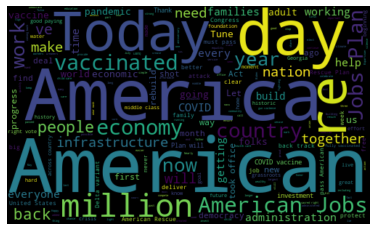

In [7]:
#@title Word Cloud
# plotting word cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [8]:
#@title Analysis
# create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,We’ve made historic economic progress and crea...,0.463889,0.375000,Positive
1,"Happy birthday, . I’m proud to call you a bro...",1.000000,0.800000,Positive
2,Workers shouldn’t just compete for jobs. Jobs ...,0.000000,0.000000,Neutral
3,We are prepared to deal with the surge in COV...,0.000000,0.000000,Neutral
4,It’s past time the super wealthy and profitabl...,0.704167,0.320833,Positive
...,...,...,...,...
195,The American Jobs Plan will ensure every Amer...,0.233333,0.122222,Positive
196,The American Jobs Plan is the largest American...,0.000000,0.000000,Neutral
197,"Under the American Jobs Plan, 100% of our nati...",0.350000,0.183333,Positive
198,Wall Street didn’t build this country—the grea...,0.150000,0.160000,Positive


In [9]:
#@title Positive Tweets
# print all the positive tweets
j = 1
sortedDf = df.sort_values(by = ['Polarity'])

for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j + 1



1) We’ve made historic economic progress and created more jobs than any administration has done in the first six months of being in office.
 
Now, we have a chance to turn this great movement into an economy that works for all Americans—not just the wealthy.

2)  Happy birthday, . I’m proud to call you a brother and a friend — and I’m grateful for your selfless service to this…

3) It’s past time the super wealthy and profitable corporations began paying their fair share. 

4) . are making historic, early strategic investments that are needed to elect Democrats in 2021, 2022, and onward.

You can help us keep building back better and elect Democrats up and down the ballot by adding a grassroots donation today.


5)  Today’s announcement makes clear that the most important protection we have against the Delta variant is the vaccine. Although m…

6) You’re not gonna find anyone who knows how to get more done for Virginia than . 

7)  Today marks the 31st anniversary of the Americans with

In [10]:
#@title Negative Tweets
# print all the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)  I condemn the mass detentions and sham trials that are the Cuban regime's efforts to threaten the Cuban people into silence. My…

2)  Yesterday’s Federal court ruling is deeply disappointing. While the court’s order does not now affect current DACA recipients, t…

3) Together, we are going to build an economy that rewards work—not just wealth. An economy that works for the backbone of this country: the people who get up every single day to work hard to provide for their families, who are just looking for a little bit of breathing room.

4)  Today we passed a grim milestone: 600,000 lives lost from COVID-19. My heart goes out to all those who’ve lost a loved one. I kn…

5) The pandemic exposed just how badly we need to invest in the foundation of our country, and in the working people of our country. That's why we proposed the American Jobs Plan—we need to make generational investments today to succeed tomorrow.

6)  Today, I’m announcing that the United States will donate half a bi

In [11]:
#@title Percentage of Posiitve Tweets
# Get the % of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

56.0

In [12]:
#@title Percentage of Negative Tweets
# Get the % of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

10.5

In [13]:
#@title Percentage of Neutral Tweets
# Get the % of neutral tweets
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['Tweets']

round((netweets.shape[0] / df.shape[0]) * 100, 1)

33.5

<function matplotlib.pyplot.show>

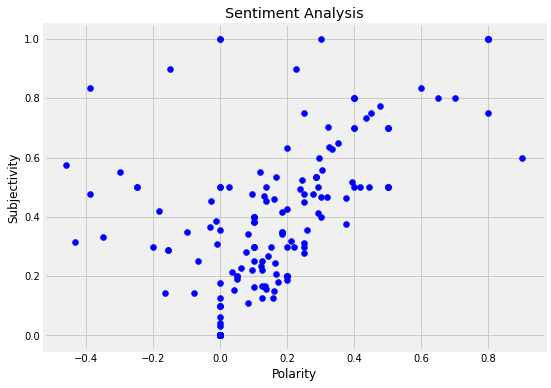

In [14]:
#@title Plot of Subjectivity and Polarity
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

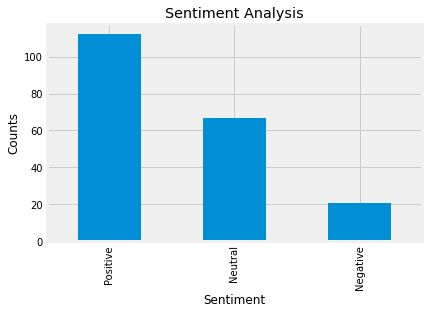

In [15]:
#@title Graph of Positive, Negative and Neutral Tweets
# Show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


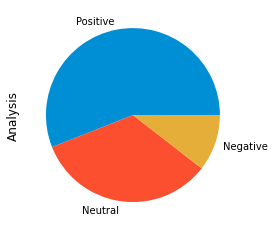

In [16]:
#@title
df['Analysis'].value_counts().plot(kind='pie')
plt.show()